In [ ]:
from node import Node
from constnode import ConstNode
from varnode import VarNode
from funcnode import FuncNode
from func import *
from treeoptimizer import TreeOptimizer
from crossover import *

import copy
import random
import graphviz
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, metrics, optimizers

In [ ]:
EPOCHS = 1
BATCH_SIZE = 512

def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
    x_train, x_test = x_train[..., tf.newaxis] / 255.0, x_test[..., tf.newaxis] / 255.0

    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(BATCH_SIZE)
    test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

    return train_dataset, test_dataset

def build_model():
    input = layers.Input(shape = (28, 28, 1))
    x = layers.Flatten()(input)
    x = layers.Dense(units = 32, activation = "relu")(x)
    output = layers.Dense(units = 10, activation = "softmax")(x)

    return models.Model(input, output)

train_dataset, test_dataset = load_data()

model = build_model()
model.compile()
model.save_weights("model.keras")

# 交叉

In [ ]:
toA = TreeOptimizer()
struct_dict = toA.make_struct_dict()
for K in struct_dict.keys():
    print(K, struct_dict[K])
toA.apply_gradients(zip(model.trainable_variables, model.trainable_variables))
toA.plot_struct()
Image.open("optimizer.png")

In [ ]:
toB = TreeOptimizer()
struct_dict = toB.make_struct_dict()
for K in struct_dict.keys():
    print(K, struct_dict[K])
toB.apply_gradients(zip(model.trainable_variables, model.trainable_variables))
toB.plot_struct()
Image.open("optimizer.png")

In [ ]:
toC = crossover(toA, toB)
struct_dict = toC.make_struct_dict()
for K in struct_dict.keys():
    print(K, struct_dict[K])
toC.apply_gradients(zip(model.trainable_variables, model.trainable_variables))
toC.plot_struct()
Image.open("optimizer.png")

In [ ]:
for _ in tqdm(range(10000)):
    toA = TreeOptimizer()
    toB = TreeOptimizer()
    toC = crossover(toA, toB)
    struct_dict = toC.make_struct_dict()
    toC.apply_gradients(zip(model.trainable_variables, model.trainable_variables))

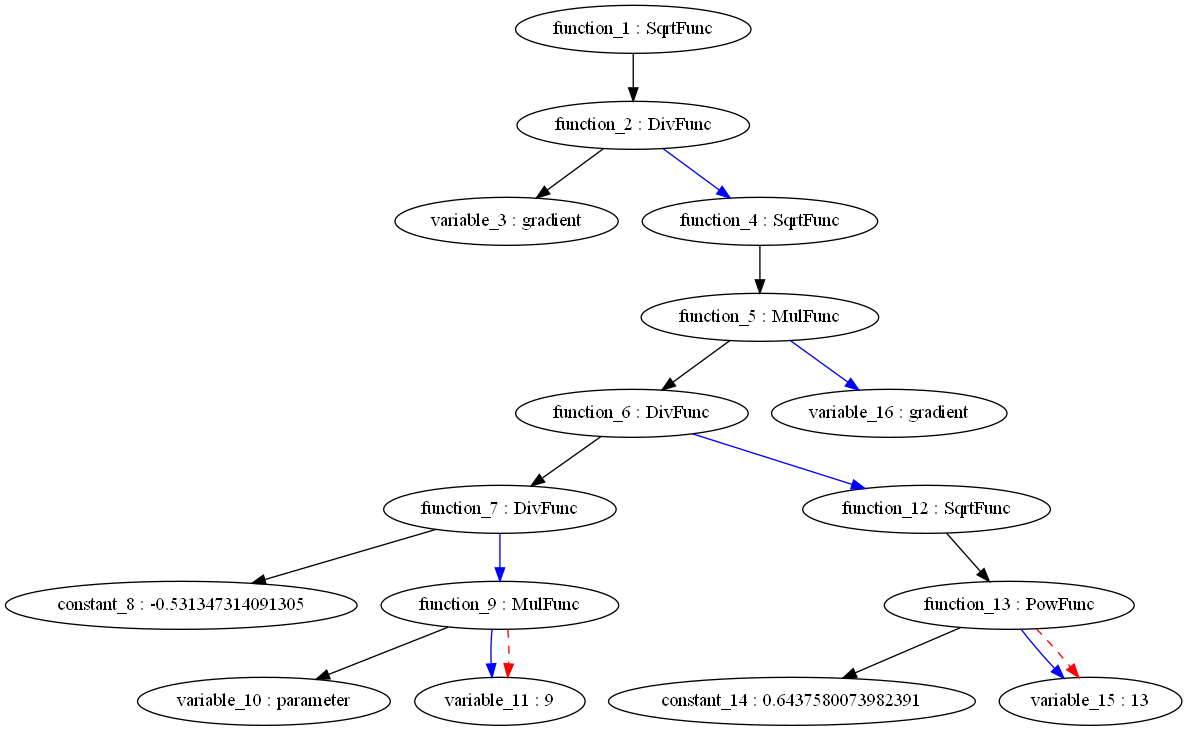

In [9]:
toA = TreeOptimizer()
toB = TreeOptimizer()
toC = crossover(toA, toB)
struct_dict = toC.make_struct_dict()
toC.apply_gradients(zip(model.trainable_variables, model.trainable_variables))
toC.plot_struct()
Image.open("optimizer.png")

# 突然変異

In [ ]:
to = TreeOptimizer()
struct_dict = to.make_struct_dict()
for K in struct_dict.keys():
    print(K, struct_dict[K])
to.apply_gradients(zip(model.trainable_variables, model.trainable_variables))
to.plot_struct()
Image.open("optimizer.png")

In [ ]:
to.mutate()
struct_dict = to.make_struct_dict()
for K in struct_dict.keys():
    print(K, struct_dict[K])
to.plot_struct()
Image.open("optimizer.png")

In [ ]:
for _ in tqdm(range(10000)):
    to.mutate()
    struct_dict = to.make_struct_dict()
    to.apply_gradients(zip(model.trainable_variables, model.trainable_variables))